# PCR / Temel Bileşen Regresyonu

Veri setlerinde bağımsız değişkenler arasında korolasyon olabilyor. 
Bu durumda daha önceden bahsdilen çoklu doğrusal ilişki sorunu olur
Ayrıca fazla değişken olmasıda sorundur (çok boyutluluk laneti)
o zaman EKK (en küçük kareler yöntemi) tahmincileri yanlılıklar oluşturmaya başlıyor.  

PCR boyut indirgemesi yaklaşımıdır. Şöyle ki:
belli sayıda değişkişkenin şfade ettiği bilgiyi daha az değişkenle ifad etme şeklidir(gerekirse az bir bilgi kaybını göze alarak) 


Yani hocam eskiden direkt regresyon uyguluyorduk. Şimdi önce boyut indirhgemesi yapıp daha sonra regresyona sokuyoruz

Bu işlem gerçekleştirildikten sonra  değişken sayısı indirgenddiğnde değişkne arasında bağlantı olmaz. 
Bu sayede hem çok booyutluluk laneti hemde öoklu doğrusal bağlantı problemi çözülmüş olur

# PCR Model

In [102]:
import pandas as pd

In [103]:
hit=pd.read_csv("Hitters.csv") # okuduk
df=hit.copy()#kopyalayalım
df=df.dropna()#eksik gözlemleri silelim
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [106]:
#kategorik değiişkenleri dummy değişkene dönüştürüyoruz
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()
#görüldüğü üzere dummy değişken tuzağına düştük 

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


Not:
Neydi bu dummy değişken tuzağı?
hocam değşkenimiz kategoik olduğu zaman sıkıntı yaşıyoruz biliyorsun. bu değişkneleri numarik yapmayaçalışıyoruz. get_dummies ile değişkenleri 

seçtiğmiz columdaki değişkenleri 0 1 lere dönüştürürüz. Language değişkeni A, N. Division değişkenş E ,W gibi değişkenlerden 
oluşurken değişken sayısının arttırıyoruz
bir tane language değişkeni olmaktansa language_A language_N gibi her  biri için ayrı ayro değişkenle  oluuşuyor. hangisi işaretliyese orijinal data'da 
o satırda o değişken 1 diğerleri 0 oluyor.  
Tuzak ise şu oluyor. Bir değişkenle ifade edilebilen değerler birden fazla değişkenle ifade edilmiş oluyor.

mesala burada Language_A ve NewLanguage_A aynı bilgileri içeriyor. Aynı şekilde Division_E ve division_W de oyle

o zaman her biriri için ayrı ayrı iki değişkene gerek yok her birinden bir tane olması yeterli yeterli


In [107]:
#şimdi hem dummy dönüşümünü yapıcaz hemde dummy tuzağından kurtulucaz ama önce bağımlı değişkenş bir saklayalım
y=df["Salary"]

#şimdi kategorik değişkenşleri ve bağımlı değişkenş data set den çıkaralım
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")

In [108]:
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


Buraya kadar ne yaptım?

data seti düzenledik kategorik değişkenler numeric değişken haline getirildi

X de bağımsız değişkemlerşmiz y de bağımlı değişkenlerimiz saklanmakta

df de ise setin ilk hali bulunmakta

# Model

In [109]:
# modeli kurucaz ama önce data mızı test ve train olarak ayıralım
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

In [110]:
print("X_train",X_train.shape)
print("X_train",X_test.shape)
print("X_train",y_train.shape)
print("X_train",y_test.shape)

training=df.copy()
print("training", training.shape)

X_train (197, 19)
X_train (66, 19)
X_train (197,)
X_train (66,)
training (263, 20)


In [111]:
# önce pca indirgemeyi uygulayacağız
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca=PCA()

In [112]:
X_reduced_train=pca.fit_transform(scale(X_train)) #bağımsız değişkenlerimizin train (eğitim) kısmını verdik

In [113]:
X_reduced_train.shape

(197, 19)

In [114]:
import numpy as np
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)[0:10]
#burada bileşenlerin varyansı açıklamam- oranına baktık. mesela 10 bileşene naktık ama dah ayarılarda %84 lük oranda
# varyans açıklanabilir durumda
# yani bizim veri setimizde normalde 20 değişken vardı ama biz bu bilgiyi su an bes bileşenle dahi açıklayabilriz 

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

In [115]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
pcr=lm.fit(X_reduced_train,y_train)

In [116]:
pcr.intercept_

543.4834416243655

In [117]:
pcr.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

# Tahmin

In [118]:
y_pred=pcr.predict(X_reduced_train)
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [119]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train,y_pred))

289.3292825564976

In [120]:
df["Salary"].mean()

535.9258821292775

In [121]:
r2_score(y_train,y_pred)

0.5770075250410179

In [122]:
# Şimdi test veri setimizle deneyelim


In [123]:
pca_test=PCA() #önce pca nesnemizi oluşturslım

In [124]:
X_reduced_test=pca_test.fit_transform(scale(X_test))#verimize boyut indirgeme uygulayalım

In [125]:
y_pred_test=pcr.predict(X_reduced_test)#daha önce oluşturduğumıuz modelimize(pcr) şimdi test data mızı gönderiyoruz

In [126]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

405.15753641499674

# Model Tuning

In [127]:
# gün geçmiyor ki yeni arızalar çıkmasın. 
# hocam burada da (pcr modelde) bileşen sayısına bağlı olarak farklı hata değerleri alıyoruz.
# şimdi burada ise optimum bileşen sayısını bulup onu göndericez bunun sonunda elde ettiğimi z hata değerini gerçek hata değeri kabul edicez

In [128]:
#yukarıda anlattığımız kısmı görmke için hızlıca modeli kurup ttekrar hata değerlerini ölçelim
lm=LinearRegression()
pcr=lm.fit(X_reduced_train,y_train)
y_pred=pcr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test,y_pred))

405.15753641499674

In [129]:
#yukarıda önce liner regresyon için nesne oluşturduk sonra hazır pca ile indirgediğimiz eğitim data larımız gönderdk(modeli kurduk)
#daha sonra test datasını kullanarak y_pred bulduk ve bunu yine y_yest ile karşılaştırarak hatayı bulduk

#? şimdii geldik bileşen sayısı muhabbetine 
#bildiğin gibi, x te bağımsız değişkenlerimiz sakladık
#işte bu değişkenlerden ne kadarının modeli kurmak ve test etmek için kullanıcaz mevzu bu

In [130]:
lm=LinearRegression()
pcr=lm.fit(X_reduced_train[0:,0:5],y_train)# 5 bileşen ile
y_pred=pcr.predict(X_reduced_test[:,0:5])
np.sqrt(mean_squared_error(y_test,y_pred))

397.2336440791341

In [131]:
lm=LinearRegression()
pcr=lm.fit(X_reduced_train[:,0:10],y_train)# 10n bileşen ile
y_pred=pcr.predict(X_reduced_test[:,0:10])
np.sqrt(mean_squared_error(y_test,y_pred))

390.79142556822234

In [132]:
#gördüğün gib, hata değerleri değişti. 
#optimium bileşen sayını bulmak için

In [133]:
from sklearn import model_selection

In [134]:
cv_10=model_selection.KFold(n_splits=10, shuffle=True, random_state=1)# 10 katlı cross validaation yapısı oluşturduk shuffle datanın karıştırışması 

In [135]:
lm=LinearRegression()
RMSE=[]

In [136]:
# her bir bileşen sayısı için oluşturulacak modeller ile cross validaion a göre train hatası hesaplanacak 
# ve bir kaydetme işlemi gerçekleşecek
# bunun sonunda bu sonuçları görelleştirip değerlendirip pcr için en ıygun bileşen sayısını buluıcaz (brute force)

In [137]:
for i in np.arange(1,X_reduced_train.shape[1]+1):
    score=np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                    X_reduced_train[:,:i], 
                                                    y_train.ravel(), 
                                                    cv=cv_10, 
                                                    scoring="neg_mean_squared_error").mean())
    RMSE.append(score)

In [138]:
# Hiper paremetre işlemini; 
# brut force yöntemiyle bir döngü yazarak RMSE leri her bir olası bileşende değerlendirerek 
# kendimiz yaptık
#elimünen dayı elimünen

In [139]:
#hadi işlemin sonuçlarına bakalım

Text(0.5, 1.0, 'Maaş Tahmin Modeli için PCR Model Tuning ')

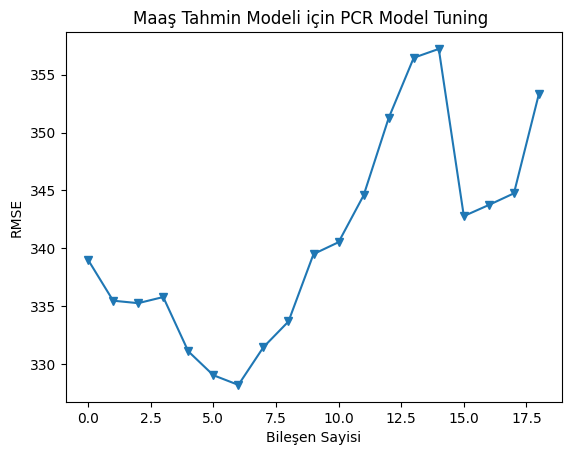

In [140]:
import matplotlib.pylab as plt

plt.plot(RMSE,"-v")
plt.xlabel("Bileşen Sayisi")
plt.ylabel("RMSE")
plt.title("Maaş Tahmin Modeli için PCR Model Tuning ")

In [141]:
#grafikten çıkarımımıza göre optimum bileşen saysı 6 dır

In [142]:
# ozman optimum bileşen saysı ile final modelimizi oluşturalım

In [143]:
lm=LinearRegression()
PCR=lm.fit(X_reduced_train[:,0:6], y_train)
y_pred=PCR.predict(X_reduced_train[:,0:6])
np.sqrt(mean_squared_error(y_train, y_pred))

308.82659830945005

In [144]:
#eğitim hatamız 308 çıktı şimdi test seti üzerinden deneyelim

In [146]:
y_pred_test=PCR.predict(X_reduced_test[:,0:6])
np.sqrt(mean_squared_error(y_test, y_pred_test))

393.1198700096223